# Data cleaning for question 1: What Movie Genres Have the Highest Average Ratings?

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataframes from csv file using pd.read_csv function and review dataframes

In [2]:
#importing cvs files and saving them under variables
imdb_basics_df = pd.read_csv('./zippedData/imdb.title.basics.csv')
imdb_ratings_df = pd.read_csv('./zippedData/imdb.title.ratings.csv')

In [3]:
#reviewing imdb_basics_df
imdb_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
#reviewing imdb_ratings_df
imdb_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Check for Nan values in the columns and remove Nan rows from dataframes of they make up less than 1% of the data

In [5]:
#checking for Nan values in each column of imdb.title.basics.csv
imdb_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [6]:
#removing Nan values in each column of imdb.title.basics.csv
imdb_basics_df = imdb_basics_df.dropna(subset=['genres', 'original_title'])
imdb_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes    28502
genres                 0
dtype: int64

In [7]:
#checking for Nan values in imdb.title.ratings.csv
imdb_ratings_df.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

*No Nan values in imdb_ratings.df*

In [8]:
#checking basic statistics for imdb_ratings_df
imdb_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [9]:
#checking for duplicates
duplicates = imdb_basics_df[imdb_basics_df.duplicated()]
print(len(duplicates))
duplicates.head()

duplicates2 = imdb_ratings_df[imdb_ratings_df.duplicated()]
print(len(duplicates))
duplicates.head()

0
0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres


*No duplicates found in either dataframe*

## Calculate z scores of numvotes and averagerating columns of imdb_ratings_df to determine standard deviations for histograms

*Z scores are calculated so that we can identify outliers and remove them from dataframe*

In [10]:
#calculating z scores for numvotes and averageratings columns of imdb_ratings_df 
#and make them into new columns on imdb_ratings_df 
numvotes_mean = imdb_ratings_df['numvotes'].mean()
numvotes_std = imdb_ratings_df['numvotes'].std()
imdb_ratings_df['z_numvotes'] = imdb_ratings_df['numvotes'].apply(lambda x: (x - numvotes_mean) / numvotes_std)


ave_rating_mean = imdb_ratings_df['averagerating'].mean()
ave_rating_std = imdb_ratings_df['averagerating'].std()
imdb_ratings_df['z_ave_rating'] = imdb_ratings_df['averagerating'].apply(lambda x: (x - ave_rating_mean) / ave_rating_std)


imdb_ratings_df.head()

,tconst,averagerating,numvotes,z_numvotes,z_ave_rating
0,tt10356526,8.3,31,-0.115292,1.333763
1,tt10384606,8.9,559,-0.097863,1.740549
2,tt1042974,6.4,20,-0.115655,0.045608
3,tt1043726,4.2,50352,1.545795,-1.445939
4,tt1060240,6.5,21,-0.115622,0.113406


## Plot histograms for numvotes and averagerating columns from imdb_ratings_df

<AxesSubplot:ylabel='Frequency'>

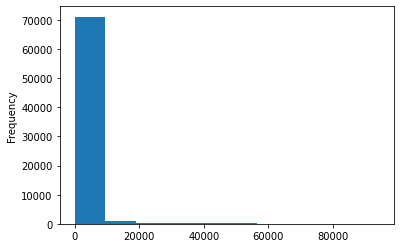

In [11]:
#plotting histogram for numvotes 
imdb_ratings_df.loc[imdb_ratings_df['z_numvotes'].abs()<3]['numvotes'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

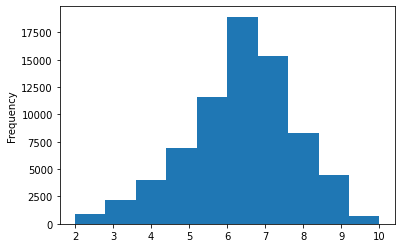

In [12]:
#plotting histogram for averagerating
imdb_ratings_df.loc[imdb_ratings_df['z_ave_rating'].abs()<3]['averagerating'].plot(kind='hist')

In [13]:
#reviewing information about the ratings dataframe
imdb_ratings_df.info()
imdb_ratings_df.head()
imdb_ratings_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
 3   z_numvotes     73856 non-null  float64
 4   z_ave_rating   73856 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.8+ MB


(73856, 5)

In [14]:
#one way of removing numvotes outliers over 20000
imdb_ratings_df_filtered = imdb_ratings_df[imdb_ratings_df['numvotes'] > 20000]
imdb_ratings_df_filtered.head()
imdb_ratings_df_filtered.shape

(1815, 5)

In [15]:
#another way of removing numvotes outliers over 20000
imdb_ratings_df.drop(imdb_ratings_df[imdb_ratings_df['numvotes'] > 20000].index, inplace = True)
imdb_ratings_df.shape

(72041, 5)

<AxesSubplot:ylabel='Frequency'>

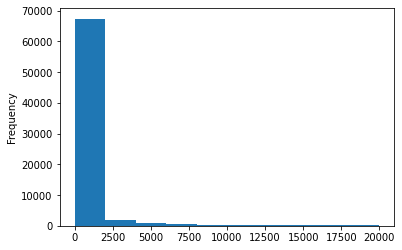

In [16]:
#reviewing the difference in the histogram and comparing it to the one above 
imdb_ratings_df.loc[imdb_ratings_df['z_numvotes'].abs()<3]['numvotes'].plot(kind='hist')

In [17]:
imdb_ratings_df.head()

,tconst,averagerating,numvotes,z_numvotes,z_ave_rating
0,tt10356526,8.3,31,-0.115292,1.333763
1,tt10384606,8.9,559,-0.097863,1.740549
2,tt1042974,6.4,20,-0.115655,0.045608
4,tt1060240,6.5,21,-0.115622,0.113406
5,tt1069246,6.2,326,-0.105554,-0.089987


In [18]:
imdb_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## Drop columns that are no longer necessary from imdb_basics_df

In [19]:
#dropping columns that are not necessary to answer question
imdb_basics_df = imdb_basics_df.drop(columns = ['primary_title', 'original_title', 'start_year', 'runtime_minutes'])
imdb_basics_df.shape

(140734, 2)

In [20]:
imdb_basics_df.head()

,tconst,genres
0,tt0063540,"Action,Crime,Drama"
1,tt0066787,"Biography,Drama"
2,tt0069049,Drama
3,tt0069204,"Comedy,Drama"
4,tt0100275,"Comedy,Drama,Fantasy"


## Split the genres column of imdb.basics.df  into individual cells 

*These cells will remain associated to the 'tconst' column since the genres were split horizontally.*

In [21]:
split_genres_df = imdb_basics_df['genres'].str.split(',', expand = True)
split_genres_df.head()

,0,1,2
0,Action,Crime,Drama
1,Biography,Drama,None
2,Drama,None,None
3,Comedy,Drama,None
4,Comedy,Drama,Fantasy


## Combine the split_genres_df and the imdb_basics_df using the 'tconst' column values

In [22]:
split_genres_df['tconst'] = imdb_basics_df['tconst']
split_genres_df.head()

,0,1,2,tconst
0,Action,Crime,Drama,tt0063540
1,Biography,Drama,None,tt0066787
2,Drama,None,None,tt0069049
3,Comedy,Drama,None,tt0069204
4,Comedy,Drama,Fantasy,tt0100275


*Use the .melt() method to gather genres into unique rows in a column.*

In [23]:
genres = split_genres_df.melt(id_vars = ['tconst'], value_name = 'genre')
genres.head()

,tconst,variable,genre
0,tt0063540,0,Action
1,tt0066787,0,Biography
2,tt0069049,0,Drama
3,tt0069204,0,Comedy
4,tt0100275,0,Comedy


## Join the genres table and imdb_ratings_df 

In [24]:
imdb_ratings_df.head()

,tconst,averagerating,numvotes,z_numvotes,z_ave_rating
0,tt10356526,8.3,31,-0.115292,1.333763
1,tt10384606,8.9,559,-0.097863,1.740549
2,tt1042974,6.4,20,-0.115655,0.045608
4,tt1060240,6.5,21,-0.115622,0.113406
5,tt1069246,6.2,326,-0.105554,-0.089987


In [25]:
#dropping columns that are not necessary to answer question
imdb_ratings_df = imdb_ratings_df.drop(columns = ['z_numvotes', 'z_ave_rating'])

*Set the index of the dataframes to 'tconst' so they can be joined by 'tconst'. 
Use inplace = True to change the dataframes.*

In [26]:
genres.set_index('tconst', inplace = True)
imdb_ratings_df.set_index('tconst', inplace = True)

In [27]:
#joining the genres and imdb_ratings_df
imdb_genres_ratings_df = genres.join(imdb_ratings_df)

In [28]:
#reviewing info on newly joined dataframe
imdb_genres_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422202 entries, tt0063540 to tt9916754
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   variable       422202 non-null  object 
 1   genre          229548 non-null  object 
 2   averagerating  213711 non-null  float64
 3   numvotes       213711 non-null  float64
dtypes: float64(2), object(2)
memory usage: 16.1+ MB


In [29]:
#reviewing dataframe
imdb_genres_ratings_df.head()

,variable,genre,averagerating,numvotes
tconst,,,,
tt0063540,0,Action,7.0,77.0
tt0063540,1,Crime,7.0,77.0
tt0063540,2,Drama,7.0,77.0
tt0066787,0,Biography,7.2,43.0
tt0066787,1,Drama,7.2,43.0


In [30]:
#reseting the index to default index instead of 'tconst'
imdb_genres_ratings_df.reset_index().head()

,tconst,variable,genre,averagerating,numvotes
0,tt0063540,0,Action,7.0,77.0
1,tt0063540,1,Crime,7.0,77.0
2,tt0063540,2,Drama,7.0,77.0
3,tt0066787,0,Biography,7.2,43.0
4,tt0066787,1,Drama,7.2,43.0


## Create a new pandas series to hold genres and their average ratings

In [31]:
#creating new variable to hold unique genres and their avg ratings
genre_mean_ratings = imdb_genres_ratings_df.groupby('genre').averagerating.mean()

In [32]:
#checking for  Nan values in each column of genre_mean_ratings
genre_mean_ratings.isna().sum()

1

In [33]:
#only 1 Nan value so we can delete it
genre_mean_ratings = genre_mean_ratings.dropna()

In [34]:
#reviewing new series and avg values
genre_mean_ratings

genre
Action         5.751778
Adult          3.766667
Adventure      6.148405
Animation      6.200856
Biography      7.161999
Comedy         5.983974
Crime          6.074370
Documentary    7.331808
Drama          6.386905
Family         6.391393
Fantasy        5.882750
Game-Show      7.300000
History        7.037224
Horror         4.969258
Music          7.098805
Musical        6.490282
Mystery        5.883076
News           7.269550
Reality-TV     6.500000
Romance        6.130134
Sci-Fi         5.398181
Short          8.800000
Sport          6.955157
Thriller       5.601729
War            6.564614
Western        5.833457
Name: averagerating, dtype: float64

## Now that we have pandas series with genres and rating averages, convert the series into a dataframe

*Use the .to_frame function to convert pandas series into dataframe.* 

In [35]:
genre_avg_ratings_df = genre_mean_ratings.to_frame()

In [36]:
genre_avg_ratings_df

,averagerating
genre,
Action,5.751778
Adult,3.766667
Adventure,6.148405
Animation,6.200856
Biography,7.161999
Comedy,5.983974
Crime,6.074370
Documentary,7.331808
Drama,6.386905


## Reset the index to the default index using .reset_index() method

*Reset the index to default index instead of 'genre' so it can be graphed and use inplace = True to change the dataframes*


In [37]:
genre_avg_ratings_df.reset_index(inplace = True)

## Using Seaborn, plot a bar graph of the data

[Text(0.5, 1.0, 'Average Ratings of Movie Genres'),
 Text(0.5, 0, 'Average Ratings'),
 Text(0, 0.5, 'Movie Genres')]

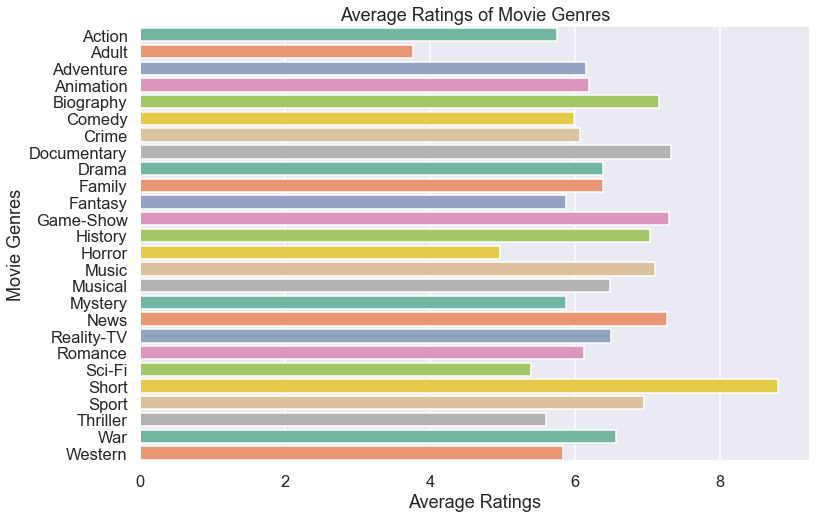

In [53]:
sns.set(style='darkgrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize = (12, 8))
genre_avg_ratings_df_plot = sns.barplot(x = 'averagerating', y = 'genre', data = genre_avg_ratings_df, palette= "Set2")
ax.set(title = 'Average Ratings of Movie Genres',
       xlabel = 'Average Ratings',
       ylabel = 'Movie Genres')